# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [33]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...") # [:80] limits the number of characters of each review per line

g = open('data/reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1].lower(),g.readlines())) # .lower() methods makes all words lower case for consistent treatment.
g.close()

g = open('data/labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. `If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it`. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [34]:
len(reviews)

25000

In [35]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [36]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

Words are predictive of labels. To test this theory, we need to make a pool of words from positive and negative reviews to investigate whethet there is a meaningful correaltion between most commonly used words in each label with that label. For example, the intution is words like `terrible`, `trash` are more common in NEGATIVE labels while words like `excellent` are more common in POSITIVE labels.

In [37]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [38]:
from collections import Counter # Counter is a convenient fast dictionary that already includes the original keys
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [39]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [40]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects

for review in range(len(reviews)):
    for word in reviews[review].split(' '):
        total_counts[word] += 1 
        if labels[review] == 'POSITIVE':
            positive_counts[word] += 1
        else:
            negative_counts[word] += 1       

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [41]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

## Alternative and less neat way to method .most_commn()

# from collections import OrderedDict
# positive_counts_sorted = OrderedDict(sorted(positive_counts.items(), key=lambda x: x[1], reverse=True))
# print(positive_counts_sorted)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [42]:
# for key in positive_counts.keys():
#     value = positive_counts[key]
#     print(key, "=" , value)

In [43]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

In [44]:
total_counts.most_common()

[('', 1111930),
 ('the', 336713),
 ('.', 327192),
 ('and', 164107),
 ('a', 163009),
 ('of', 145864),
 ('to', 135720),
 ('is', 107328),
 ('br', 101872),
 ('it', 96352),
 ('in', 93968),
 ('i', 87623),
 ('this', 76000),
 ('that', 73245),
 ('s', 65361),
 ('was', 48208),
 ('as', 46933),
 ('for', 44343),
 ('with', 44125),
 ('movie', 44039),
 ('but', 42603),
 ('film', 40155),
 ('you', 34230),
 ('on', 34200),
 ('t', 34081),
 ('not', 30626),
 ('he', 30138),
 ('are', 29430),
 ('his', 29374),
 ('have', 27731),
 ('be', 26957),
 ('one', 26789),
 ('all', 23978),
 ('at', 23513),
 ('they', 22906),
 ('by', 22546),
 ('an', 21560),
 ('who', 21433),
 ('so', 20617),
 ('from', 20498),
 ('like', 20276),
 ('there', 18832),
 ('her', 18421),
 ('or', 18004),
 ('just', 17771),
 ('about', 17374),
 ('out', 17113),
 ('if', 16803),
 ('has', 16790),
 ('what', 16159),
 ('some', 15747),
 ('good', 15143),
 ('can', 14654),
 ('more', 14251),
 ('she', 14223),
 ('when', 14182),
 ('very', 14069),
 ('up', 13291),
 ('time', 127

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

This is `Normalization` process where common words between both (all) labels are eliminated so that `most frequently` `distint` words of each label stand out. As we can see, there are 34775 common words that should be removed.

In [45]:
print("Number of words in POSITIVE reviews is {}: ".format(len(positive_counts)),
      "\nNumber of words in NEGATIVE reviews is {}: ".format(len(negative_counts)), 
      "\nTotal number of words in both labels is {}:".format(len(total_counts)), 
      "\nNumber of common words between both labels is {} which is more than {}% of POSITIVE and {}% of NEGATIVE category.".
      format((len(positive_counts)+len(negative_counts)-len(total_counts)), 
             (100 * (len(positive_counts)+len(negative_counts)-len(total_counts)) // len(positive_counts)),
             (100 * (len(positive_counts)+len(negative_counts)-len(total_counts)) // len(negative_counts))))

Number of words in POSITIVE reviews is 55214:  
Number of words in NEGATIVE reviews is 53635:  
Total number of words in both labels is 74074: 
Number of common words between both labels is 34775 which is more than 62% of POSITIVE and 64% of NEGATIVE category.


In [46]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times

for term, count in list(total_counts.most_common()):
    if count > 100:
        pos_neg_ratios[term] = positive_counts[term] / float(negative_counts[term] + 1)

In [47]:
pos_neg_ratios.most_common()

[('edie', 109.0),
 ('paulie', 59.0),
 ('felix', 23.4),
 ('polanski', 16.833333333333332),
 ('matthau', 16.555555555555557),
 ('victoria', 14.6),
 ('mildred', 13.5),
 ('gandhi', 12.666666666666666),
 ('flawless', 11.6),
 ('superbly', 9.583333333333334),
 ('perfection', 8.666666666666666),
 ('astaire', 8.5),
 ('captures', 7.68),
 ('voight', 7.615384615384615),
 ('wonderfully', 7.552631578947368),
 ('powell', 7.230769230769231),
 ('brosnan', 7.0625),
 ('lily', 6.823529411764706),
 ('bakshi', 6.705882352941177),
 ('lincoln', 6.695652173913044),
 ('refreshing', 6.392857142857143),
 ('breathtaking', 6.3478260869565215),
 ('bourne', 6.346153846153846),
 ('lemmon', 6.333333333333333),
 ('delightful', 6.051282051282051),
 ('flynn', 6.0476190476190474),
 ('andrews', 5.909090909090909),
 ('homer', 5.866666666666666),
 ('beautifully', 5.828125),
 ('soccer', 5.8),
 ('elvira', 5.695652173913044),
 ('underrated', 5.583333333333333),
 ('gripping', 5.565217391304348),
 ('superb', 5.524271844660194),
 (

In [48]:
pos_neg_ratios.get("the")

1.0607993145235326

Examine the ratios you've calculated for a few words:

In [49]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))
print("Pos-to-neg ratio for 'trash' = {}".format(pos_neg_ratios["trash"]))
print("Pos-to-neg ratio for 'excellent' = {}".format(pos_neg_ratios["excellent"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218
Pos-to-neg ratio for 'trash' = 0.32894736842105265
Pos-to-neg ratio for 'excellent' = 4.326478149100257


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [50]:
# TODO: Convert ratios to logs
for term, ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[term] = np.log(ratio)

Examine the new ratios you've calculated for the same words from before:

In [51]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))
print("Pos-to-neg ratio for 'trash' = {}".format(pos_neg_ratios["trash"]))
print("Pos-to-neg ratio for 'excellent' = {}".format(pos_neg_ratios["excellent"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878
Pos-to-neg ratio for 'trash' = -1.1118575154181303
Pos-to-neg ratio for 'excellent' = 1.4647538505723599


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [52]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [53]:
# words most frequently seen in a review with a "NEGATIVE" label
pos_neg_ratios.most_common()[:-31:-1]
# list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

_So, intuition theory is confirmed; individual words instead of review are predictve of that reveiew positive or negative's label._

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

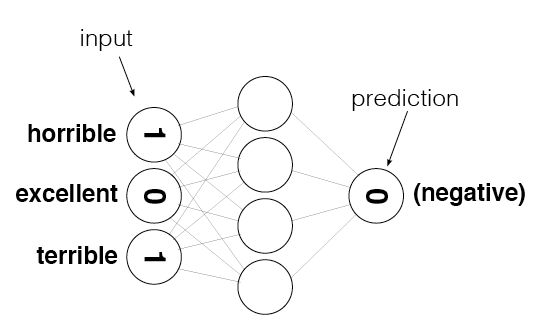

In [54]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='assets/sentiment_network.png')

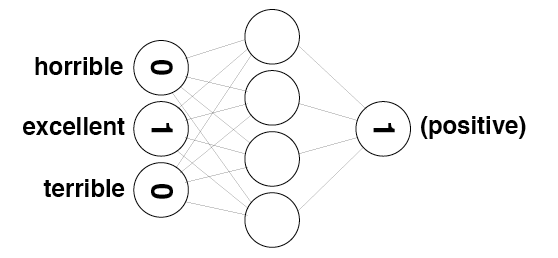

In [55]:
review = "The movie was excellent"

Image(filename='assets/sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [56]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = set(total_counts.keys())
vocab

{'',
 'unlike',
 'expositionary',
 'merge',
 'predominate',
 'medic',
 'clifton',
 'shave',
 'slurpee',
 'phineas',
 'jodha',
 'zaz',
 'frisco',
 'gloaming',
 'administrators',
 'judgements',
 'vicenzo',
 'prostitution',
 'instants',
 'sheba',
 'crashing',
 'honorable',
 'womanly',
 'hier',
 'signification',
 'loveable',
 'senorita',
 'howzbout',
 'glenrowan',
 'depressants',
 'remembrance',
 'wigs',
 'hares',
 'modelling',
 'vouched',
 'luminous',
 'bards',
 'panjabi',
 'buchinsky',
 'boneheaded',
 'secretive',
 'rothschild',
 'sunekosuri',
 'mcnairy',
 'moors',
 'jumpstart',
 'saturate',
 'stubs',
 'innapropriate',
 'ganzel',
 'vittorio',
 'pati',
 'bonfire',
 'brujo',
 'monsalvat',
 'evangelists',
 'kriemshild',
 'moulds',
 'expansiveness',
 'seiner',
 'bended',
 'allot',
 'kanmuri',
 'dregs',
 'disreguarded',
 'doorless',
 'leonidas',
 'enviro',
 'menari',
 'bjorlin',
 'homelife',
 'luger',
 'flamethrower',
 'rapping',
 'aimants',
 'baseketball',
 'cleares',
 'friendless',
 'alec',

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [57]:
vocab_size = len(vocab)
print(vocab_size)

74074


Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

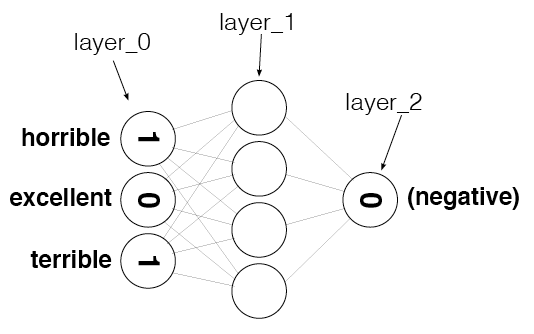

In [58]:
from IPython.display import Image
Image(filename='assets/sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [59]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
## Basically, each index of layer_0 represents a word from the vocabulary set. 
layer_0 = np.zeros(shape=(1, vocab_size)) # BEST PRACTICE: pre-allocate the vector and then edit it as you go as to an empty vector
                                          # not to allocate new memory each time variable is called  

Run the following cell. It should display `(1, 74074)`

In [60]:
layer_0.shape

(1, 74074)

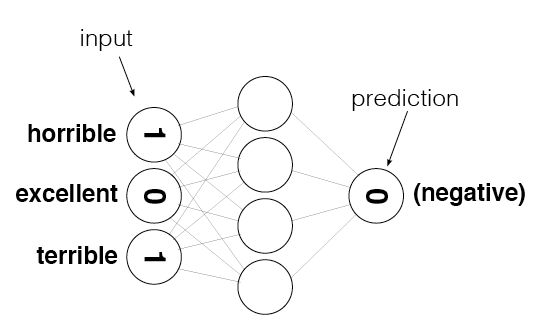

In [61]:
from IPython.display import Image
Image(filename='assets/sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [62]:
# Create a dictionary of words in the vocabulary mapped to index positions. Note that the vocabulary is not ordered.
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):# enumerate() method adds a counter to an iterable.
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'unlike': 1,
 'expositionary': 2,
 'merge': 3,
 'predominate': 4,
 'medic': 5,
 'clifton': 6,
 'shave': 7,
 'slurpee': 8,
 'phineas': 9,
 'jodha': 10,
 'zaz': 11,
 'frisco': 12,
 'gloaming': 13,
 'administrators': 14,
 'judgements': 15,
 'vicenzo': 16,
 'prostitution': 17,
 'instants': 18,
 'sheba': 19,
 'crashing': 20,
 'honorable': 21,
 'womanly': 22,
 'hier': 23,
 'signification': 24,
 'loveable': 25,
 'senorita': 26,
 'howzbout': 27,
 'glenrowan': 28,
 'depressants': 29,
 'remembrance': 30,
 'wigs': 31,
 'hares': 32,
 'modelling': 33,
 'vouched': 34,
 'luminous': 35,
 'bards': 36,
 'panjabi': 37,
 'buchinsky': 38,
 'boneheaded': 39,
 'secretive': 40,
 'rothschild': 41,
 'sunekosuri': 42,
 'mcnairy': 43,
 'moors': 44,
 'jumpstart': 45,
 'saturate': 46,
 'stubs': 47,
 'innapropriate': 48,
 'ganzel': 49,
 'vittorio': 50,
 'pati': 51,
 'bonfire': 52,
 'brujo': 53,
 'monsalvat': 54,
 'evangelists': 55,
 'kriemshild': 56,
 'moulds': 57,
 'expansiveness': 58,
 'seiner': 59,
 'ben

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [63]:
def update_input_layer(review): # Note that review is a general input argument to the funtion like reviews[0]. 
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0
    ## Recall that each index of layer_0 represents a word from the vocabulary set. Iterations start with the first word of the 
    ## passed review; and layer_0 is updated from 0 to 1 at the relevant row and coloumn indices of [0] and [word2index[word]]. 
    ## As the iteration continous, layer_0 matrix is populated with the count values of every words at their relevant indices.    
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1 

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [64]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [65]:
# index 0 of layer_0 matrix which is empty space '' is repeated 18 times in reviews[0]
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [66]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    if (label == 'POSITIVE'):
        return 1
    else:
        return 0

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [67]:
labels[0]

'POSITIVE'

In [68]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [69]:
labels[1]

'NEGATIVE'

In [70]:
get_target_for_label(labels[1])

0

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [71]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews.
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for index, word in enumerate(self.review_vocab):
            self.word2index[word] = index # populate self.word2index with indices for all the words in self.review_vocab
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for index, label in enumerate(self.label_vocab):
            self.label2index[label] = index  
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # initialize self.weights_0_1 as a matrix of zeros. 
        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros(shape=(self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        # Create the input layer, a two-dimensional matrix with shape  
        # 1 x input_nodes, with all values initialized to zero.
        self.layer_0 = np.zeros((1, input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state by resetting the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            if (word in self.word2index.keys()): 
            # The if-check simply ensures the word is actually a key in word2index before
            # accessing it, which is important because accessing an invalid key will raise an exception in Python. 
            # This allows us to ignore unknown words encountered in new reviews.
                self.layer_0[0][self.word2index[word]] += 1 
                
    def get_target_for_label(self,label):
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1+np.exp(-x)) 
    
    def sigmoid_output_2_derivative(self,output):
        # Return the derivative of the sigmoid activation function, 
        # where "output" is the original output from the sigmoid fucntion 
        return output * (1- output)
    
    # Note that this is just one EPOCH training
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###
            
            # Input_layer
            self.update_input_layer(review)
 
            # Hidden layer
            layer_1 = np.matmul(self.layer_0, self.weights_0_1) # no activation function to preserve the linearity

            # Output layer
            layer_2 = self.sigmoid(np.matmul(layer_1, self.weights_1_2))       
              
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            # Output error
            layer_2_error =  self.get_target_for_label(label) - layer_2   
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2) # adjust for the slope of non-linearity
            
            # Backpropagated error
            layer_1_error = np.matmul(layer_2_delta, self.weights_1_2.T) # errors propagated to the hidden layer
            # note in feedforward weights_1_2 is multiplied with layer_1 as input while in backpopogation its transpose 
            # is multiplied with downstream (next layer) error term as the input.
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error (no adjustment)
            
            # update weights
            self.weights_1_2 += self.learning_rate * layer_2_delta * layer_1.T # update hidden-to-output weights with gradient descent step
            self.weights_0_1 += self.learning_rate * layer_1_delta * self.layer_0.T # update input-to-hidden weights with gradient descent step
            
            # Keep track of corrcet label predictions
            # how accurate are the predictions
            if abs(layer_2_error) < 0.5:
                correct_so_far += 1
            
            # how fast we are training    
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0): # every 2500, make a new line
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0 # this is the time for a full forward-backward pass
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        
        # Input Layer
        self.update_input_layer(review.lower())
        
        # Hidden Layer
        layer_1 = np.matmul(self.layer_0, self.weights_0_1)
        
        # Output Layer
        layer_2 = self.sigmoid(np.matmul(layer_1, self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [72]:
# instantiate the model
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from. `If test accuracy is exactly 50% for a two-label prediction like this case, it assures that weights are not biased towards one label side.`**

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [73]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):935.9 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

### Just by looking at first few predictions that are even below the test accuracy of 50%, we can tell something is wrong here and hence we don't need to continue the training!

In [74]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):148.9 #Correct:1246 #Trained:2501 Training Accuracy:49.8%
Progress:20.8% Speed(reviews/sec):147.2 #Correct:2371 #Trained:5001 Training Accuracy:47.4%
Progress:31.2% Speed(reviews/sec):149.0 #Correct:3580 #Trained:7501 Training Accuracy:47.7%
Progress:41.6% Speed(reviews/sec):149.0 #Correct:4999 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):149.6 #Correct:6394 #Trained:12501 Training Accuracy:51.1%
Progress:62.5% Speed(reviews/sec):149.8 #Correct:7644 #Trained:15001 Training Accuracy:50.9%
Progress:72.9% Speed(reviews/sec):150.2 #Correct:8894 #Trained:17501 Training Accuracy:50.8%
Progress:83.3% Speed(reviews/sec):150.4 #Correct:10144 #Trained:20001 Training Accuracy:50.7%
Progress:93.7% Speed(reviews/sec):150.6 #Correct:11394 #Trained:22501 Training Accuracy:50.6%
Progress:99.9% Speed(reviews/sec):150.6 #Correct:12143 #Trained:24000 Training Acc

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [75]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):153.0 #Correct:1407 #Trained:2501 Training Accuracy:56.2%
Progress:20.8% Speed(reviews/sec):153.8 #Correct:3004 #Trained:5001 Training Accuracy:60.0%
Progress:31.2% Speed(reviews/sec):154.0 #Correct:4686 #Trained:7501 Training Accuracy:62.4%
Progress:41.6% Speed(reviews/sec):153.9 #Correct:6431 #Trained:10001 Training Accuracy:64.3%
Progress:52.0% Speed(reviews/sec):154.3 #Correct:8209 #Trained:12501 Training Accuracy:65.6%
Progress:62.5% Speed(reviews/sec):154.2 #Correct:9991 #Trained:15001 Training Accuracy:66.6%
Progress:72.9% Speed(reviews/sec):154.0 #Correct:11771 #Trained:17501 Training Accuracy:67.2%
Progress:83.3% Speed(reviews/sec):154.0 #Correct:13637 #Trained:20001 Training Accuracy:68.1%
Progress:93.7% Speed(reviews/sec):153.7 #Correct:15492 #Trained:22501 Training Accuracy:68.8%
Progress:99.9% Speed(reviews/sec):153.6 #Correct:16646 #Trained:24000 Training Ac

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [76]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):152.7 #Correct:1355 #Trained:2501 Training Accuracy:54.1%
Progress:20.8% Speed(reviews/sec):147.1 #Correct:2912 #Trained:5001 Training Accuracy:58.2%
Progress:31.2% Speed(reviews/sec):143.5 #Correct:4572 #Trained:7501 Training Accuracy:60.9%
Progress:41.6% Speed(reviews/sec):141.5 #Correct:6316 #Trained:10001 Training Accuracy:63.1%
Progress:52.0% Speed(reviews/sec):140.6 #Correct:8113 #Trained:12501 Training Accuracy:64.8%
Progress:62.5% Speed(reviews/sec):140.2 #Correct:9908 #Trained:15001 Training Accuracy:66.0%
Progress:72.9% Speed(reviews/sec):139.9 #Correct:11699 #Trained:17501 Training Accuracy:66.8%
Progress:83.3% Speed(reviews/sec):138.8 #Correct:13573 #Trained:20001 Training Accuracy:67.8%
Progress:93.7% Speed(reviews/sec):138.6 #Correct:15441 #Trained:22501 Training Accuracy:68.6%
Progress:99.9% Speed(reviews/sec):138.5 #Correct:16596 #Trained:24000 Training Ac

With a learning rate of `0.001`, the network should finally have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

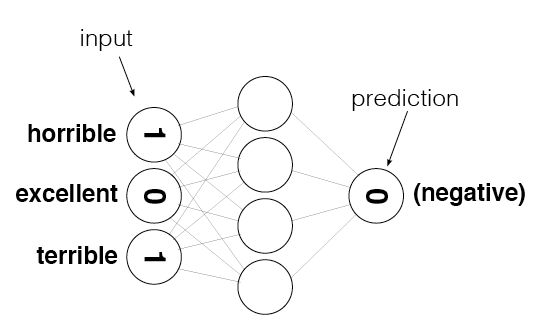

In [77]:
from IPython.display import Image
Image(filename='assets/sentiment_network.png')

`Note that we need to reset layer_0 after training the model otherwise it will be a scalar with the the size of the last review that model has been trained for.`

In [78]:
layer_0 = np.zeros(shape=(1, vocab_size))
layer_0.shape

(1, 74074)

In [79]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [80]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [81]:
review_counter = Counter()

In [82]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

### _Take a close look to see the noise: dominant words/terms are dot, empty space, filling words like the, is and ... which have nothing to do with the real sentiment as our signal! These are called NOISE as they mask the true signal by having much higher weights in the summation of input values._

In [83]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it `does not count how many times each word is used, but rather just stores whether or not a word was used.` 

In [84]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews.
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for index, word in enumerate(self.review_vocab):
            self.word2index[word] = index # populate self.word2index with indices for all the words in self.review_vocab
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for index, label in enumerate(self.label_vocab):
            self.label2index[label] = index  
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # initialize self.weights_0_1 as a matrix of zeros. 
        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros(shape=(self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        # Create the input layer, a two-dimensional matrix with shape  
        # 1 x input_nodes, with all values initialized to zero.
        self.layer_0 = np.zeros((1, input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state by resetting the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            if (word in self.word2index.keys()): 
            # The if-check simply ensures the word is actually a key in word2index before
            # accessing it, which is important because accessing an invalid key will raise an exception in Python. 
            # This allows us to ignore unknown words encountered in new reviews.
                self.layer_0[0][self.word2index[word]] = 1 # changed to set to 1 instead of add 1. In this way, all the existing terms
                                                           # in a given reveiw are weighed the same and hence relevant noise is removed.  
                
    def get_target_for_label(self,label):
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1+np.exp(-x)) 
    
    def sigmoid_output_2_derivative(self,output):
        # Return the derivative of the sigmoid activation function, 
        # where "output" is the original output from the sigmoid fucntion 
        return output * (1- output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###
            
            # Input_layer
            self.update_input_layer(review)
 
            # Hidden layer
            layer_1 = np.matmul(self.layer_0, self.weights_0_1) # no activation function to preserve the linearity

            # Output layer
            layer_2 = self.sigmoid(np.matmul(layer_1, self.weights_1_2))       
              
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            # Output error
            layer_2_error =  self.get_target_for_label(label) - layer_2   
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2) # adjust for the slope of non-linearity
            
            # Backpropagated error
            layer_1_error = np.matmul(layer_2_delta, self.weights_1_2.T) # errors propagated to the hidden layer
            # note in feedforward weights_1_2 is multiplied with layer_1 as input while in backpopogation its transpose 
            # is multiplied with downstream (next layer) error term as the input.
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error (no adjustment)
            
            # update weights
            self.weights_1_2 += self.learning_rate * layer_2_delta * layer_1.T # update hidden-to-output weights with gradient descent step
            self.weights_0_1 += self.learning_rate * layer_1_delta * self.layer_0.T # update input-to-hidden weights with gradient descent step
            
            # Keep track of corrcet label predictions
            # how accurate are the predictions
            if abs(layer_2_error) < 0.5:
                correct_so_far += 1
            
            # how fast we are training    
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0): # every 2500, make a new line
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        
        # Input Layer
        self.update_input_layer(review.lower())
        
        # Hidden Layer
        layer_1 = np.matmul(self.layer_0, self.weights_0_1)
        
        # Output Layer
        layer_2 = self.sigmoid(np.matmul(layer_1, self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [85]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):148.7 #Correct:1948 #Trained:2501 Training Accuracy:77.8%
Progress:20.8% Speed(reviews/sec):150.3 #Correct:3993 #Trained:5001 Training Accuracy:79.8%
Progress:31.2% Speed(reviews/sec):152.5 #Correct:6120 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):150.0 #Correct:8277 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):150.1 #Correct:10438 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):149.4 #Correct:12579 #Trained:15001 Training Accuracy:83.8%
Progress:72.9% Speed(reviews/sec):149.3 #Correct:14693 #Trained:17501 Training Accuracy:83.9%
Progress:83.3% Speed(reviews/sec):149.2 #Correct:16867 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):150.3 #Correct:19054 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):150.8 #Correct:20374 #Trained:24000 Training 

That should have trained much better than the earlier attempts. `Infact, our accuracy for the same learning rate increased 30% just by reducing the noise that was accumulating number of existing words. Problem was removed by making the input binary; 0 if a word does not exist in the vocabulary set and 1 if it exists. In this way, all wxisting words will have consistent weight.` It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [86]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1154. #Correct:860 #Tested:1000 Testing Accuracy:86.0%

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

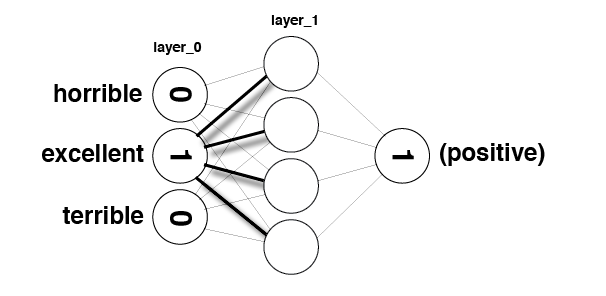

In [87]:
Image(filename='assets/sentiment_network_sparse.png')

`The first inefficiency that stand out is that we have a large input array (+74,000) equivalent to our vocabulary size where most of its elements are zero for the given review. Multiplying input_to_hidden_layer weights by zero elements does not change anything; so we can save tons of memory computation by eliminating zero multiplication.
Second inefficiency is that non-zero inputs are just 1s and 1 * weights_0_1 is the same as weights_0_1. So, we can eliminate these unnessary multiplications as well. Integrations of these two efficiency improvements is to to eliminate the input layer and modify the hidden layer summation (x1w1+x1w2+...+xnwn) just based on the index of exisiting words in the given review.`

In [88]:
# assume this is the input vocabulary index array
layer_0 = np.zeros(10)
layer_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
# populate two random indices with 1 
# assume there are the indices of the words in the review 
layer_0[4] = 1
layer_0[9] = 1
layer_0

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [90]:
# random weights of hidden layer (5 nodes)
weights_0_1 = np.random.randn(10,5)

In [91]:
layer_0.dot(weights_0_1)

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

NOW SEE HOW WE CAN REMOVE THE BOTTLENECKS!

In [92]:
# 1. get the indices of the existing words
indices = [4,9]

In [93]:
# 2. Initialize hidden layer 
# note the size reduction from input size of 10 to hidden layer size of 5
layer_1 = np.zeros(5)
layer_1

array([0., 0., 0., 0., 0.])

In [94]:
# 3. Update the hidden layer based on the indices 
for index in indices:
    layer_1 += weights_0_1[index]

In [95]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [96]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews.
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for index, word in enumerate(self.review_vocab):
            self.word2index[word] = index # populate self.word2index with indices for all the words in self.review_vocab
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for index, label in enumerate(self.label_vocab):
            self.label2index[label] = index  
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # initialize self.weights_0_1 as a matrix of zeros. 
        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros(shape=(self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        ## New for Project 5: Removed self.layer_0; added self.layer_1
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes.
        self.layer_1 = np.zeros((1, hidden_nodes))

        ## New for Project 5: Removed update_input_layer function
                
    def get_target_for_label(self,label):
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1+np.exp(-x)) 
    
    def sigmoid_output_2_derivative(self,output):
        # Return the derivative of the sigmoid activation function, 
        # where "output" is the original output from the sigmoid fucntion 
        return output * (1- output)

    def train(self, training_reviews_raw, training_labels):
#         breakpoint()
        ## New for Project 5: pre-process training reviews so we can deal 
        #                     directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                # if the particular word in the review exits
                # word2index vocabulary, find its index and 
                # add the word index to the indices set
                if (word in self.word2index.keys()):
                    indices.add(self.word2index[word]) # add method works with set
            # at the end of the loop, indices of all words are found from word2index vocabulary.
            # indices set is converted to list and its elements are appended to training_reviews list.
            # TAKE IMPORTANT NOTE that training_reviews is just a list of lists where each list is indices of words for a review.
#             breakpoint()
            training_reviews.append(list(indices))  
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###
            
            ## New for Project 5: Removed call to 'update_input_layer' function
            #                     because 'layer_0' is no longer used

            # Hidden layer
            # no activation function to preserve the linearity
            ## New for Project 5: Add in only the weights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]            

            # Output layer
            ## New for Project 5: changed to use 'self.layer_1' instead of 'local layer_1'
            layer_2 = self.sigmoid(np.matmul(self.layer_1, self.weights_1_2))       
              
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            # Output error
            layer_2_error =  self.get_target_for_label(label) - layer_2   
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2) # adjust for the slope of non-linearity
            
            # Backpropagated error
            layer_1_error = np.matmul(layer_2_delta, self.weights_1_2.T) # errors propagated to the hidden layer
            # note in feedforward weights_1_2 is multiplied with layer_1 as input while in backpopogation its transpose 
            # is multiplied with downstream (next layer) error term as the input.
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error (no adjustment)
            
            # update weights
            ## New for Project 5: changed to use 'self.layer_1' instead of local 'layer_1'            
            self.weights_1_2 += self.learning_rate * layer_2_delta * self.layer_1.T # update hidden-to-output weights with gradient descent step

            ## New for Project 5: Only update the weights that were used in the forward pass
            for index in review:
                self.weights_0_1[index] += self.learning_rate * layer_1_delta[0] # update input-to-hidden weights with gradient descent step
            
            # Keep track of corrcet label predictions
            # how accurate are the predictions
            if abs(layer_2_error) < 0.5:
                correct_so_far += 1
            
            # how fast we are training    
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0): # every 2500, make a new line
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """

        # Run a forward pass through the network, like in the "train" function.
        
        ## New for Project 5: Removed call to update_input_layer function
        #                     because layer_0 is no longer used
        
        # Hidden Layer
        ## New for Project 5: Identify the indices used in the review and then add
        #                     just those weights to layer_1 
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output Layer
        ## New for Project 5: changed to use self.layer_1 instead of local layer_1
        layer_2 = self.sigmoid(np.matmul(self.layer_1, self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

Run the following cell to recreate the network and train it once again.

In [97]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):1340. #Correct:1948 #Trained:2501 Training Accuracy:77.8%
Progress:20.8% Speed(reviews/sec):1254. #Correct:3993 #Trained:5001 Training Accuracy:79.8%
Progress:31.2% Speed(reviews/sec):1213. #Correct:6120 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):1234. #Correct:8277 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):1245. #Correct:10438 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):1251. #Correct:12579 #Trained:15001 Training Accuracy:83.8%
Progress:72.9% Speed(reviews/sec):1263. #Correct:14693 #Trained:17501 Training Accuracy:83.9%
Progress:83.3% Speed(reviews/sec):1268. #Correct:16867 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):1272. #Correct:19054 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):1273. #Correct:20374 #Trained:24000 Training Ac

That should have trained much better than the earlier attempts. `Infact, speed has improved almostone order of magnitude`. Run the following cell to test your model with 1000 predictions.

In [98]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2133. #Correct:860 #Tested:1000 Testing Accuracy:86.0%

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

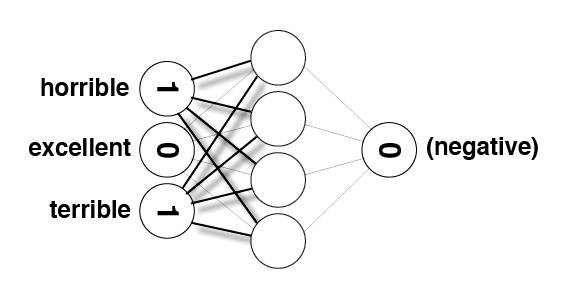

In [99]:
Image(filename='assets/sentiment_network_sparse_2.png')

In [100]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [101]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

In [102]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [103]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

`In NLP, it is common practice to apply a cut-off to remove ambiguous words such that important sentiments stand out. For instance, here the important words are on either tails far away from center.` 

In [104]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [105]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

`Basically what we do in this section is that: if frequency of a word in total_counts is higher than a given cnt, its pos_neg_ratios is calculated that should meet a criteria to be added to the review_vocab set for training, otherwise it is not added. On the ther hand, if the word frequency is above min_count but below the given cnt to calculate its pos_neg_ratio, it is automatically added for training to review_vocab.`

In [106]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, min_count = 10, polarity_cutoff = 0.1, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            min_count(int) - Words should only be added to the vocabulary 
                             if they occur more than this many times
            polarity_cutoff(float) - The absolute value of a word's positive-to-negative
                                     ratio must be at least this big to be considered.
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels, polarity_cutoff, min_count)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels, polarity_cutoff, min_count):

        ## ----------------------------------------
        ## New for Project 6: Calculate positive-to-negative ratios for words before
        #                     building vocabulary
        #
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50): # the pos_neg_ratio ratio is not calculatd for a term that happens less than this count in a huge dataset 
                           # (regarless of being actually very positive or negative in few reviwes) .  
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        #
        ## end New for Project 6
        ## ----------------------------------------
        
        # populate review_vocab with all of the words in the given reviews.
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                ## New for Project 6: only add words that occur at least min_count times
                #                     and for words with pos/neg ratios, only add words
                #                     that meet the polarity_cutoff
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()): # recall that for a word to be in these pos_neg_ratios.keys(),  
                                                       # it should have repeated more than a specific cnt! 
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for index, word in enumerate(self.review_vocab):
            self.word2index[word] = index # populate self.word2index with indices for all the words in self.review_vocab
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for index, label in enumerate(self.label_vocab):
            self.label2index[label] = index  
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # initialize self.weights_0_1 as a matrix of zeros. 
        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros(shape=(self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        ## New for Project 5: Removed self.layer_0; added self.layer_1
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes.
        self.layer_1 = np.zeros((1, hidden_nodes))

        ## New for Project 5: Removed update_input_layer function
                
    def get_target_for_label(self,label):
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1+np.exp(-x)) 
    
    def sigmoid_output_2_derivative(self,output):
        # Return the derivative of the sigmoid activation function, 
        # where "output" is the original output from the sigmoid fucntion 
        return output * (1- output)

    def train(self, training_reviews_raw, training_labels):
#         breakpoint()
        ## New for Project 5: pre-process training reviews so we can deal 
        #                     directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                # if the particular word in the review exits
                # word2index vocabulary, find its index and 
                # add the word index to the indices set
                if (word in self.word2index.keys()):
                    indices.add(self.word2index[word]) # add method works with set
            # at the end of the loop, indices of all words are found from word2index vocabulary.
            # indices set is converted to list and its elements are appended to training_reviews list.
            # TAKE IMPORTANT NOTE that training_reviews is just a list of lists where each list is indices of words for a review.
#             breakpoint()
            training_reviews.append(list(indices))  
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###
            
            ## New for Project 5: Removed call to 'update_input_layer' function
            #                     because 'layer_0' is no longer used

            # Hidden layer
            # no activation function to preserve the linearity
            ## New for Project 5: Add in only the weights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]            

            # Output layer
            ## New for Project 5: changed to use 'self.layer_1' instead of 'local layer_1'
            layer_2 = self.sigmoid(np.matmul(self.layer_1, self.weights_1_2))       
              
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            # Output error
            layer_2_error =  self.get_target_for_label(label) - layer_2   
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2) # adjust for the slope of non-linearity
            
            # Backpropagated error
            layer_1_error = np.matmul(layer_2_delta, self.weights_1_2.T) # errors propagated to the hidden layer
            # note in feedforward weights_1_2 is multiplied with layer_1 as input while in backpopogation its transpose 
            # is multiplied with downstream (next layer) error term as the input.
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error (no adjustment)
            
            # update weights
            ## New for Project 5: changed to use 'self.layer_1' instead of local 'layer_1'            
            self.weights_1_2 += self.learning_rate * layer_2_delta * self.layer_1.T # update hidden-to-output weights with gradient descent step

            ## New for Project 5: Only update the weights that were used in the forward pass
            for index in review:
                self.weights_0_1[index] += self.learning_rate * layer_1_delta[0] # update input-to-hidden weights with gradient descent step
            
            # Keep track of corrcet label predictions
            # how accurate are the predictions
            if abs(layer_2_error) < 0.5:
                correct_so_far += 1
            
            # how fast we are training    
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0): # every 2500, make a new line
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """

        # Run a forward pass through the network, like in the "train" function.
        
        ## New for Project 5: Removed call to update_input_layer function
        #                     because layer_0 is no longer used
        
        # Hidden Layer
        ## New for Project 5: Identify the indices used in the review and then add
        #                     just those weights to layer_1 
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output Layer
        ## New for Project 5: changed to use self.layer_1 instead of local layer_1
        layer_2 = self.sigmoid(np.matmul(self.layer_1, self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

Run the following cell to train your network with a small polarity cutoff.

In [107]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0.00,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):1292. #Correct:1943 #Trained:2501 Training Accuracy:77.6%
Progress:20.8% Speed(reviews/sec):1257. #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):1260. #Correct:6118 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):1259. #Correct:8272 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):1262. #Correct:10432 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):1266. #Correct:12553 #Trained:15001 Training Accuracy:83.6%
Progress:72.9% Speed(reviews/sec):1268. #Correct:14677 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):1261. #Correct:16868 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):1264. #Correct:19049 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):1264. #Correct:20373 #Trained:24000 Training 

And run the following cell to test it's performance. It should be 

In [108]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2341. #Correct:855 #Tested:1000 Testing Accuracy:85.5%

Run the following cell to train your network with a much larger polarity cutoff.

In [109]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
start_time = time.time()
mlp.train(reviews[:-1000],labels[:-1000])
print("\nTotal training time is %s minutes." % round((time.time() - start_time) / 60, 3))

Progress:0.0% Speed(reviews/sec):0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):6670. #Correct:2054 #Trained:2501 Training Accuracy:82.1%
Progress:20.8% Speed(reviews/sec):6414. #Correct:4102 #Trained:5001 Training Accuracy:82.0%
Progress:31.2% Speed(reviews/sec):6435. #Correct:6160 #Trained:7501 Training Accuracy:82.1%
Progress:41.6% Speed(reviews/sec):6442. #Correct:8256 #Trained:10001 Training Accuracy:82.5%
Progress:52.0% Speed(reviews/sec):6039. #Correct:10354 #Trained:12501 Training Accuracy:82.8%
Progress:62.5% Speed(reviews/sec):5663. #Correct:12459 #Trained:15001 Training Accuracy:83.0%
Progress:72.9% Speed(reviews/sec):5358. #Correct:14549 #Trained:17501 Training Accuracy:83.1%
Progress:83.3% Speed(reviews/sec):5365. #Correct:16697 #Trained:20001 Training Accuracy:83.4%
Progress:93.7% Speed(reviews/sec):5414. #Correct:18853 #Trained:22501 Training Accuracy:83.7%
Progress:99.9% Speed(reviews/sec):5494. #Correct:20134 #Trained:24000 Training Ac

And run the following cell to test it's performance.

In [110]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):5839. #Correct:822 #Tested:1000 Testing Accuracy:82.2%

Test accuracy has dropped 3.5% while speed has increase more 250%. If our initial dataset were bigger, even this small performance drop would have not occured. `It is always preferable to train model on larger datasets with less ambigious words at higher speed.` 

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [111]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [112]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):1312. #Correct:1943 #Trained:2501 Training Accuracy:77.6%
Progress:20.8% Speed(reviews/sec):1081. #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):1106. #Correct:6118 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):1124. #Correct:8272 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):1152. #Correct:10432 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):1167. #Correct:12553 #Trained:15001 Training Accuracy:83.6%
Progress:72.9% Speed(reviews/sec):1173. #Correct:14677 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):1159. #Correct:16868 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):1162. #Correct:19049 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):1163. #Correct:20373 #Trained:24000 Training 

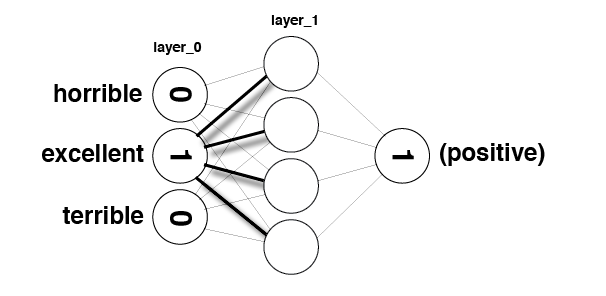

In [113]:
Image(filename='assets/sentiment_network_sparse.png')

In [114]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [115]:
get_most_similar_words("excellent")

[('excellent', 0.14660809065567865),
 ('perfect', 0.12526627358447937),
 ('great', 0.10713868923526688),
 ('amazing', 0.10165619345416502),
 ('wonderful', 0.09706521876360931),
 ('best', 0.09633584659210818),
 ('today', 0.09062129241360578),
 ('fun', 0.08856844988594428),
 ('loved', 0.079106386972062),
 ('definitely', 0.07691091698161273),
 ('superb', 0.07625261018425636),
 ('favorite', 0.07421414380924657),
 ('liked', 0.07309620138898558),
 ('highly', 0.07303203507414299),
 ('job', 0.07223219355737712),
 ('enjoyable', 0.07139077485296322),
 ('fantastic', 0.071372919421981),
 ('brilliant', 0.0701480998108388),
 ('enjoyed', 0.07007551170945969),
 ('beautiful', 0.06537602848214633),
 ('bit', 0.06337484480718464),
 ('perfectly', 0.0633001209458898),
 ('simple', 0.06215249402622902),
 ('especially', 0.06105517211951693),
 ('rare', 0.05742123887773784),
 ('incredible', 0.05717795369660566),
 ('very', 0.05685178291127867),
 ('love', 0.056210337945972313),
 ('always', 0.056051745040948495),
 

In [116]:
get_most_similar_words("terrible")

[('worst', 0.17615579852418917),
 ('awful', 0.1257519612518591),
 ('waste', 0.11991666736024728),
 ('poor', 0.10184592068658213),
 ('boring', 0.09740082138736944),
 ('terrible', 0.09719201719001998),
 ('bad', 0.08194195157424213),
 ('dull', 0.0812879868188303),
 ('worse', 0.0750550215832054),
 ('poorly', 0.07495944377181997),
 ('annoying', 0.07439793982531952),
 ('stupid', 0.07426584328733316),
 ('unfortunately', 0.07334568638877406),
 ('disappointing', 0.07184347946941996),
 ('nothing', 0.07096306592213647),
 ('fails', 0.06993653880365731),
 ('horrible', 0.06705521767527382),
 ('mess', 0.06600134753888896),
 ('disappointment', 0.06549661129048738),
 ('supposed', 0.06247782574684839),
 ('badly', 0.060986416793552906),
 ('save', 0.06095285949526355),
 ('wasted', 0.06033795328339325),
 ('ridiculous', 0.06005541702141827),
 ('oh', 0.05865240593522189),
 ('minutes', 0.05842679650457269),
 ('avoid', 0.05752767013826616),
 ('script', 0.05722205707556034),
 ('crap', 0.056784390748523025),
 ('

In [117]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [118]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [119]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [120]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words

This section is to state that a well trained neural network, cluster input words into proper distinct categories based on how they predict the label without even knowing the meaning of the words. In other words, similar words based on their effect on label prediction are weighed almost the same. For example, we can see that all words like excellent, perfect, amazing, ... are weighed the same without machine knowing their meaning!    

# Summary of `binary` sentiment classification process:

 * Create three Counter objects to store positive, negative and total counts
 
 * Normalize for the effect of common words like the, is, ... that do not convey any sentiment load through calculating `np.log(pos_to_neg_ratio)` counter to focus on the words found in positive reviews more often than in negative reviews, and vice versa. As a result, neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`.
 
 * Tokenize review and label words by transforming them into numbers:
 >* Create a set of unique words from all reviews as the vocabulary set (use set) 
 >* Map each unique words to an integer (use enumerate)
 >* Map labels to 0 or 1.
 
 * Reduce noise by strategically reducing the Vocabulary such that important sentiments stand out:
 >* Apply a `min_count' so that only words higher that cut-off are added to the vocabulary (avoid rare words and reduce noise). 
 >* Apply a `polarity_cutoff` so that only words with their postive-to-negative higher than the cut-off are added to the vocabulary (discard neutral words as possible).  
 
 * Build the network efficiently:
 >* Find the indecis of all words in the input review from the processed training vocabulary. 
 >* Update hidden layer just by updating the weights of elements that correspond to the indecis of the input words (discrad tonnes of unnecessary matrix multiplication)

In [139]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...") # [:80] limits the number of characters of each review per line

g = open('data/reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1].lower(),g.readlines())) # .lower() methods makes all words lower case for consistent treatment.
g.close()

g = open('data/labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [140]:
import time
import sys
from collections import Counter # Counter is a convenient fast dictionary that already includes the original keys
import numpy as np


# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, min_count = 10, polarity_cutoff = 0.1, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            min_count(int) - Words should only be added to the vocabulary 
                             if they occur more than this many times
            polarity_cutoff(float) - The absolute value of a word's positive-to-negative
                                     ratio must be at least this big to be considered.
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get 
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything 
        # is ready for training
        self.pre_process_data(reviews, labels, polarity_cutoff, min_count)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels, polarity_cutoff, min_count):
        ## Calculate positive-to-negative ratios for words before building vocabulary
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50): # the pos_neg_ratio ratio is not calculatd for a term that happens less than this count in a huge dataset 
                           # (regarless of being actually very positive or negative in few reviwes) .  
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        # populate review_vocab with all of the words in the given reviews.
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                # only add words that occur at least min_count times
                # and for words with pos/neg ratios, only add words that meet the polarity_cutoff
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()): # recall that for a word to be in these pos_neg_ratios.keys(),  
                                                       # it should have repeated more than a specific cnt! 
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for index, word in enumerate(self.review_vocab):
            self.word2index[word] = index # populate self.word2index with indices for all the words in self.review_vocab
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for index, label in enumerate(self.label_vocab):
            self.label2index[label] = index  
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # initialize self.weights_0_1 as a matrix of zeros. 
        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros(shape=(self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, size=(self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes.
        self.layer_1 = np.zeros((1, hidden_nodes))
                
    def get_target_for_label(self,label):
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1+np.exp(-x)) 
    
    def sigmoid_output_2_derivative(self,output):
        # Return the derivative of the sigmoid activation function, 
        # where "output" is the original output from the sigmoid fucntion 
        return output * (1- output)

    def train(self, training_reviews_raw, training_labels):
        ## pre-process training reviews so we can deal directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                # if the particular word in the review exits in word2index vocabulary, 
                # find its index and add the word index to the indices set
                if (word in self.word2index.keys()):
                    indices.add(self.word2index[word]) # add method works with set
            # at the end of the loop, indices of all words are found from word2index vocabulary.
            # indices set is converted to list and its elements are appended to training_reviews list.
            # TAKE IMPORTANT NOTE that training_reviews is just a list of lists where each list is indices of words for a review.
            training_reviews.append(list(indices))  
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###
            
            # Hidden layer
            # no activation function to preserve the linearity
            ## Add in only the weights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]            

            # Output layer
            layer_2 = self.sigmoid(np.matmul(self.layer_1, self.weights_1_2))       
              
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            # Output error
            layer_2_error =  self.get_target_for_label(label) - layer_2   
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2) # adjust for the slope of non-linearity
            
            # Backpropagated error
            layer_1_error = np.matmul(layer_2_delta, self.weights_1_2.T) # errors propagated to the hidden layer
            # note in feedforward weights_1_2 is multiplied with layer_1 as input while in backpopogation its transpose 
            # is multiplied with downstream (next layer) error term as the input.
            layer_1_delta = layer_1_error * 1 # hidden layer gradients - no nonlinearity so it's the same as the error (no adjustment)
            
            # update weights   
            self.weights_1_2 += self.learning_rate * layer_2_delta * self.layer_1.T # update hidden-to-output weights with gradient descent step

            ## Only update the weights that were used in the forward pass
            for index in review:
                self.weights_0_1[index] += self.learning_rate * layer_1_delta[0] # update input-to-hidden weights with gradient descent step
            
            # Keep track of corrcet label predictions
            # how accurate are the predictions
            if abs(layer_2_error) < 0.5:
                correct_so_far += 1
            
            # how fast we are training    
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0): # every 2500, make a new line
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """

        # Run a forward pass through the network, like in the "train" function.

        # Hidden Layer
        ## Identify the indices used in the review and then add just those weights to layer_1 
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output Layer
        layer_2 = self.sigmoid(np.matmul(self.layer_1, self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [141]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(reviews)*split_frac)
train_x, remaining_x = reviews[:split_idx], reviews[split_idx:]
train_y, remaining_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

In [142]:
# instantiate the model
mlp_full = SentimentNetwork(reviews[:split_idx],labels[:split_idx],min_count=250,polarity_cutoff=0.5,learning_rate=0.01)

# start the clock
start_time = time.time()
# call th etrain function

mlp_full.train(reviews[:split_idx],labels[:split_idx])
# print the training time
print("\nTotal training time is %s minutes." % round((time.time() - start_time) / 60, 3))

Progress:0.0% Speed(reviews/sec):0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:12.5% Speed(reviews/sec):7613. #Correct:2023 #Trained:2501 Training Accuracy:80.8%
Progress:25.0% Speed(reviews/sec):7483. #Correct:4039 #Trained:5001 Training Accuracy:80.7%
Progress:37.5% Speed(reviews/sec):7232. #Correct:6109 #Trained:7501 Training Accuracy:81.4%
Progress:50.0% Speed(reviews/sec):7326. #Correct:8200 #Trained:10001 Training Accuracy:81.9%
Progress:62.5% Speed(reviews/sec):7188. #Correct:10342 #Trained:12501 Training Accuracy:82.7%
Progress:75.0% Speed(reviews/sec):7180. #Correct:12436 #Trained:15001 Training Accuracy:82.9%
Progress:87.5% Speed(reviews/sec):7083. #Correct:14536 #Trained:17501 Training Accuracy:83.0%
Progress:99.9% Speed(reviews/sec):7118. #Correct:16681 #Trained:20000 Training Accuracy:83.4%
Total training time is 0.069 minutes.


In [143]:
mlp.test(reviews[split_idx:],labels[split_idx:])

Progress:99.9% Speed(reviews/sec):5998. #Correct:4356 #Tested:5000 Testing Accuracy:87.1%